# DEVELOPMENT C3 WEEK 1

Explanataion of the task...

This task has many ways to solve it. First, we have to decide which local descriptor we are will use: SIFT, Dense SIFT, ORB or AKAZE. Each one will be tested first with a standard configuration and see which are the results.

In [2]:
import os
import json
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from main import run_experiment

os.makedirs("results", exist_ok=True)

In [3]:
def load_json(config_path):
    if not os.path.exists(config_path):
        raise FileNotFoundError(f"Please create the file {config_path} first!")

    with open(config_path, "r") as f:
        experiments_list = json.load(f)

    return experiments_list

In [9]:
# Load experiments from JSON
config_path = "configs/local_descriptors.json"

experiments_list = load_json(config_path=config_path)

results_data = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

# Run Loop
for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_data.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

# Create DataFrame 
df = pd.DataFrame(results_data)

# Display cleaned table
print("Processed Results:")
display(df)

df.to_csv("results/local_descriptors.csv", index=False)

print("\nAll experiments finished.")

Loaded 3 experiments from configs/local_descriptors.json

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:04<00:00, 2101.83it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:04<00:00, 1943.07it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2567 (+/- 0.0111)
Accuracy on Phase [Train]: 0.3025
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1836.56it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2795

Running: ORB (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:02<00:00, 3124.69it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2263.25it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1657 (+/- 0.0078)
Accuracy on Phase [Train]: 0.2043
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:01<00:00, 1827.73it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1645

Running: AKAZE (Default)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:02<00:00, 3174.99it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2260.76it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1726 (+/- 0.0066)
Accuracy on Phase [Train]: 0.2097
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:00<00:00, 2241.39it/s]


Predicting values...
Accuracy on Phase [Test]: 0.1791
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT (N=500),0.302529,0.279545,19.687864
1,ORB (N=500),0.204253,0.164545,17.623109
2,AKAZE (Default),0.209655,0.179091,17.741560



All experiments finished.


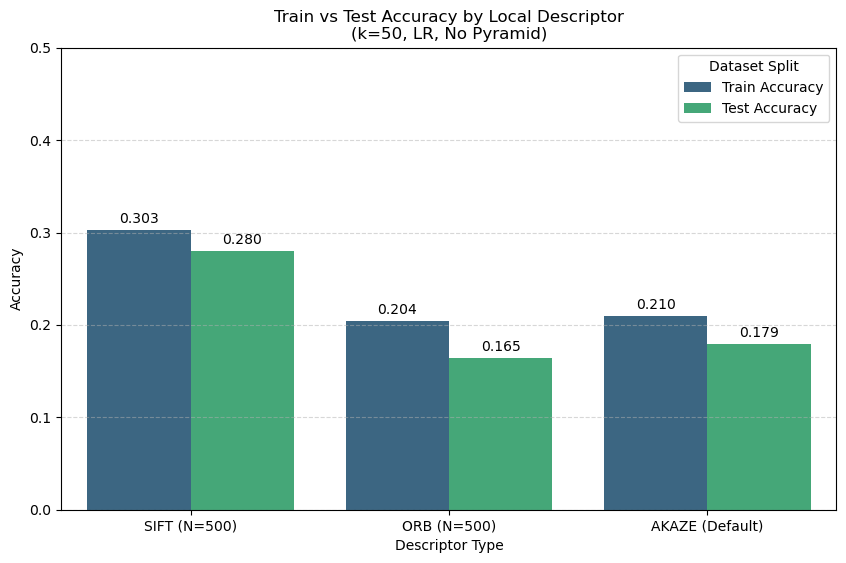

In [10]:
#load data
df = pd.read_csv("results/local_descriptors.csv")

df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

# 4. Plot
plt.figure(figsize=(10, 6))

# Grouped Bar Plot
ax = sns.barplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis"
)

# Add numeric labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

plt.title("Train vs Test Accuracy by Local Descriptor\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Adjusted limit since values are around 0.2 - 0.3
plt.ylabel("Accuracy")
plt.xlabel("Descriptor Type")
plt.legend(title="Dataset Split", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Nfeatures of sift

In [9]:
# Load experiments from JSON
config_path = "configs/sift_nfeatures.json"

experiments_list = load_json(config_path=config_path)

results_sift_nfeatures = []
print(f"Loaded {len(experiments_list)} experiments from {config_path}")

for exp in experiments_list:
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n==========================================")
    print(f"Running: {run_name}")
    print(f"==========================================")
    
    start_time = time.time()
    
    # Execute
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    results_sift_nfeatures.append({
        "Descriptor": run_name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

# Create DataFrame 
df = pd.DataFrame(results_sift_nfeatures)

# Display cleaned table
print("Processed Results:")
display(df)

df.to_csv("results/sift_nfeatures.csv", index=False)

print("\nAll experiments finished.")

Loaded 8 experiments from configs/sift_nfeatures.json

Running: SIFT (N=50)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N50\train


Phase [train]: Extracting features: 100%|██████████| 8700/8700 [01:51<00:00, 77.79it/s]


[train] Extraction complete. Descriptors saved to disk.
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:05<00:00, 132.26it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2868.27it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.1890 (+/- 0.0183)
Accuracy on Phase [Train]: 0.2325
Processing Test Data...
[test] Computing descriptors... Saving to ./computed_descriptors\SIFT_keypoints_N50\test


Phase [test]: Extracting features: 100%|██████████| 2200/2200 [00:28<00:00, 75.89it/s]


[test] Extraction complete. Descriptors saved to disk.
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:16<00:00, 130.95it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2041

Running: SIFT (N=100)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:07<00:00, 128.55it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:03<00:00, 2182.79it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2084 (+/- 0.0203)
Accuracy on Phase [Train]: 0.2533
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:18<00:00, 116.59it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2305

Running: SIFT (N=500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:58<00:00, 149.91it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:07<00:00, 1176.30it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2567 (+/- 0.0111)
Accuracy on Phase [Train]: 0.3025
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:02<00:00, 834.49it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2795

Running: SIFT (N=1000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:10<00:00, 854.50it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 775.55it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2666 (+/- 0.0197)
Accuracy on Phase [Train]: 0.3128
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 589.51it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2968

Running: SIFT (N=1500)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:09<00:00, 872.15it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 759.40it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0131)
Accuracy on Phase [Train]: 0.3190
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 616.31it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2882

Running: SIFT (N=3000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [00:09<00:00, 901.46it/s] 


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 758.37it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:03<00:00, 631.69it/s]


Predicting values...
Accuracy on Phase [Test]: 0.2909

Running: SIFT (N=5000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:11<00:00, 121.61it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:11<00:00, 745.54it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:23<00:00, 93.46it/s] 


Predicting values...
Accuracy on Phase [Test]: 0.2909

Running: SIFT (N=10000)
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors found on disk. Loading...
Processing Train Data...
[train] Gathering file paths...
Fitting Codebook in batches of 1000...


Fitting Codebook: 100%|██████████| 8700/8700 [01:24<00:00, 103.12it/s]


Computing BoVW histograms [Train]...


Computing BoVW Histograms: 100%|██████████| 8700/8700 [00:12<00:00, 723.79it/s]


Fitting the classifier: LogisticRegression...
Performing Cross-Validation...
CV Accuracy: 0.2700 (+/- 0.0173)
Accuracy on Phase [Train]: 0.3109
Processing Test Data...
[test] Gathering file paths...
Computing BoVW histograms (Test)...


Computing BoVW Histograms: 100%|██████████| 2200/2200 [00:24<00:00, 89.78it/s] 


Predicting values...
Accuracy on Phase [Test]: 0.2909
Processed Results:


,Descriptor,Train Accuracy,Test Accuracy,Time (s)
0,SIFT (N=50),0.232529,0.204091,241.469252
1,SIFT (N=100),0.253333,0.230455,103.099622
2,SIFT (N=500),0.302529,0.279545,80.270917
3,SIFT (N=1000),0.312759,0.296818,37.375105
4,SIFT (N=1500),0.318966,0.288182,37.359983
5,SIFT (N=3000),0.310920,0.290909,36.953145
6,SIFT (N=5000),0.310920,0.290909,119.159583
7,SIFT (N=10000),0.310920,0.290909,133.874259



All experiments finished.


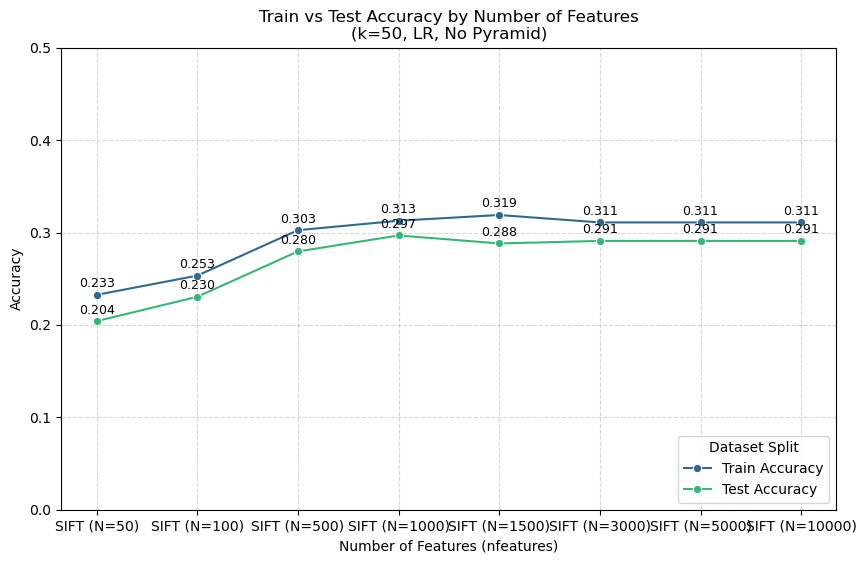

In [ ]:
# load data
df = pd.read_csv("results/sift_nfeatures.csv")

df_melted = df.melt(
    id_vars=["Descriptor"], 
    value_vars=["Train Accuracy", "Test Accuracy"], 
    var_name="Split", 
    value_name="Accuracy"
)

plt.figure(figsize=(10, 6))

# Line Plot
ax = sns.lineplot(
    x="Descriptor", 
    y="Accuracy", 
    hue="Split", 
    data=df_melted, 
    palette="viridis",
    marker="o" 
)

# Labeling values on a line chart (Optional)
# This loop adds the text label next to each point
for x, y, val in zip(df_melted["Descriptor"], df_melted["Accuracy"], df_melted["Accuracy"]):
    plt.text(x, y + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.title("Train vs Test Accuracy by Number of Features\n(k=50, LR, No Pyramid)")
plt.ylim(0, 0.5) # Keep your limits or adjust as needed
plt.ylabel("Accuracy")
plt.xlabel("Number of Features (nfeatures)")
plt.legend(title="Dataset Split", loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Dense SIFT

In [ ]:
# --- GRID SEARCH PARAMETERS ---
step_sizes = [4, 8, 16, 32]   # X-axis: Density (smaller = denser)
scale_factors = [1, 2, 4]     # Y-axis: Relative Size (Scale = Step * Factor)

# Common base configuration
BASE_CONFIG = {
    "data_path": "../data/MIT_split/",
    "seed": 42,
    
    "detector": "SIFT",
    "dense": True,          # Enable Dense SIFT
    "detector_kwargs": {},
    
    "codebook_size": 50,    # Keep k low for speed
    "spatial_pyramid": False,
    "levels": [1],
    
    "classifier": "LogisticRegression",
    "C": 1.0,
    "gamma": "scale",

    "codebook_batch_size": 1000,

    "max_samples_train": None,
    "max_samples_test": None
}

# --- EXPERIMENT GENERATOR ---
experiments_list = []

for step in step_sizes:
    for factor in scale_factors:
        # Calculate actual scale in pixels
        scale_pixels = int(step / factor)
        
        # Copy base config
        cfg = BASE_CONFIG.copy()
        
        # Inject variable parameters
        cfg["step_size"] = step
        cfg["scale"] = scale_pixels
        
        # Save metadata for plotting later
        exp_name = f"Dense (Step={step}, Scale={scale_pixels})"
        
        experiments_list.append({
            "name": exp_name,
            "config": cfg,
            "meta_step": step,
            "meta_factor": f"{factor}x Step" # Pretty label for legend
        })

print(f"Generated {len(experiments_list)} experiments in memory.")

results_data = []

print(f"Starting Dense SIFT Grid Search...")

for i, exp in enumerate(experiments_list):
    run_name = exp["name"]
    cfg = exp["config"]
    
    print(f"\n[{i+1}/{len(experiments_list)}] Running: {run_name} ...")
    start_time = time.time()
    
    # Execute pipeline
    # main.py returns (train_acc, test_acc)
    train_acc, test_acc = run_experiment(cfg)
    
    duration = time.time() - start_time
    
    # Store results + metadata for plotting
    results_data.append({
        "Step Size": exp["meta_step"],
        "Scale Factor": exp["meta_factor"],
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Time (s)": duration
    })

print("\nGrid Search completed!")

Generated 12 experiments in memory.
Starting Dense SIFT Grid Search...

[1/12] Running: Dense (Step=4, Scale=4) ...
Loaded 8700 images from ../data/MIT_split/train
Loaded 2200 images from ../data/MIT_split/test
Descriptors not found. Computing...
Processing Train Data...
[train] Computing descriptors... Saving to ./computed_descriptors\SIFT_dense_step4_size4\train


Phase [train]: Extracting features:  88%|████████▊ | 7671/8700 [08:03<00:59, 17.21it/s]